In [188]:
#imports

import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt

In [328]:
class hawkesbythinning:
    """
    Implementation of Algorithm 2 (Hawkes Process by thinning) detailed
    in the paper: Hawkes Processes, 
    https://arxiv.org/pdf/1507.02822.pdf   
    """
    
    def __init__(self, eps, T, lambda_, alpha, beta):
        
        # sanity check
        assert T > 0
        
        self.T = T
        self.eps = eps
        self.lambda_ = lambda_
        self.alpha = alpha
        self.beta = beta
        self.P = []
        self.lam_star = []
        self.t = 0
        
    def lamb_star(self, t, P):
        """
        Compute the intensity value, given the intensity function on pg. 4.
        """
        component_map = map(lambda x: self.alpha*np.exp(-self.beta*(t-x)), P)
        val = self.lambda_ + sum(list(component_map))
        return val
    
    def main(self):
        """
        main function to call.
        """
        while self.t < self.T:
            M = self.lamb_star(self.t + self.eps, self.P)
            E = random.exponential(M)
            self.t += E
            U = random.uniform(0, M)
            if (self.t < self.T) and (U <= self.lamb_star(self.t, self.P)):
                self.P.append(self.t)
                self.lam_star.append(M)
        return self.P
        
        
    

In [342]:
trial = hawkesbythinning(0.0000001, 10, 0.02, 2, 1.2)
arrivals_ = trial.main()

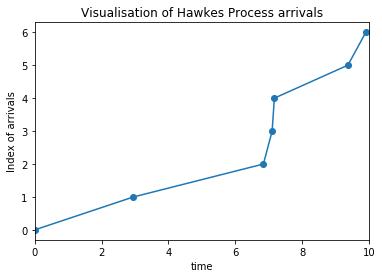

In [343]:
# visualise the time of arrivals

plt.plot(arrivals_,  range(len(arrivals_)), marker='o')
plt.xlabel("time")
plt.ylabel("Index of arrivals")
plt.xlim([0,10])
plt.title("Visualisation of Hawkes Process arrivals")
plt.show()

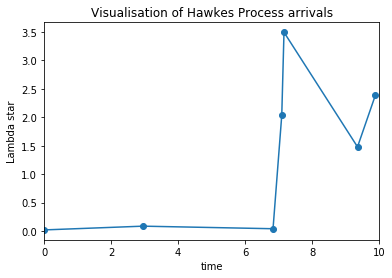

In [344]:
plt.plot(arrivals_,trial.lam_star, marker='o')
plt.xlabel("time")
plt.ylabel("Lambda star")
plt.xlim([0,10])
plt.title("Visualisation of Hawkes Process arrivals")
plt.show()

In [ ]:
############################################

In [280]:
class hawkesbyclusters:
    """
    Implementation of Algorithm 3 (Hawkes Process by clusters) detailed
    in the paper: Hawkes Processes, 
    https://arxiv.org/pdf/1507.02822.pdf   
    """
    
    def __init__(self, T, lambda_, alpha, beta):
        
        self.T = T
        self.lambda_ = lambda_
        self.alpha = alpha
        self.beta = beta
        self.P = []
        
    def generate_immigrants(self):
        """
        generate number of immigrants, as well as their respective
        times of arrival.
        """
        self.k = random.poisson(self.lambda_*self.T)
        self.Ck_arr = random.uniform(0, self.T, self.k)
        
    def generate_descendants(self):
        """
        generate number of descendants for each immigrant.
        """
        self.Dk_arr = random.poisson(self.alpha/self.beta, self.k)
        
    def main(self):
        """
        main algorithm to generate hawkes process.
        """
        self.generate_immigrants()
        self.generate_descendants()
        
        for i in range(self.k):
            desc = self.Dk_arr[i]
            if desc > 0:
                E_desc_arr = random.exponential(self.beta, desc)
                E_desc_times_arr = self.Ck_arr[i] + E_desc_arr
                self.P.extend(E_desc_times_arr)
        
        #remove descendants that arrived outside [0,T]
        self.P_final = [d for d in self.P if d <= self.T]
        
        #add in immigrants and sort arrival times
        self.P_final.extend(self.Ck_arr)
        self.P_final.sort()
        
        return self.P_final
                
                
                
    

In [281]:
# initialise the parameters of the Hawkes Process and generate the points
test = hawkesbyclusters(10, 1, 2, 1.2)
arrivals = test.main()

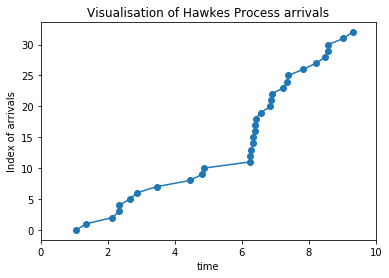

In [282]:
# visualise the time of arrivals

plt.plot(arrivals, range(len(arrivals)), marker='o')
plt.xlabel("time")
plt.ylabel("Index of arrivals")
plt.xlim([0,10])
plt.title("Visualisation of Hawkes Process arrivals")
plt.show()

In [ ]:
####################